In [1]:
from generator import Pattern_generator, pattern_mixer, get_pulse_list, day_list_2_end_start_tuple_list

In [2]:
import timesynth as ts
import numpy as np
import math
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import random
%matplotlib inline

# PG1 = Pattern_generator(stop_time=10, period=24, amplitude=10, std=1, ftype = np.sin, signal_type = ts.signals.Sinusoidal)
# #PG1.plot()
# #PG1.plot(False)
# print(PG1.series_length)
# print(PG1.stop_time)
# print(PG1.get_smooth_values())
# ptl = [(2000,4000),(5000,6000)]
# ml = [3,-2]
# PG1.move(position_tuple_list = ptl, magnitude_list = ml, bump_the_smoother_line = True)
# PG1.plot()
# PG1.plot(False)
# PG1.move(position_tuple_list = ptl, magnitude_list = ml, bump_the_smoother_line = False)
# PG1.plot()
# PG1.plot(False)

In [3]:
# GENERAL ASSUMPTION
window_size = 192
period_length = 24
N = 12500
n_periods_per_window = window_size // period_length
time_series_length = window_size * N
amp = 1
std = 0.1
BASE_PATTERN = Pattern_generator(stop_time=time_series_length, period=24, amplitude=amp/2, std=std, ftype = np.sin, signal_type = ts.signals.Sinusoidal)
# BASE_PATTERN.move_to_above_zero()
# BASE_PATTERN.plot()

# DATASET NO. 1
# Potential Usage: (TBA) testing and prediction? 对照组？
# 随机选择1%的数据长度，放入起伏，对于放入位置没有过多要求 （不overlap即可），需有长短不一（短，中，长）的起伏持续长度。
# 起伏的振幅与正常周期函数相同，即，起伏处(此时可以理解为异常)为正常峰值的两倍左右。


In [4]:
# ===> 设计 hours_in_day, days_in_week, days_in_month 三种起伏，每种各三个类似
    
n = 3 # num_choice_for_each_pattern
# hours_in_day pattern
hd_len_mean = 9
hd_len_std = 2
hd_pattern_list = get_pulse_list(num=n, length_mean=hd_len_mean, length_std=hd_len_std, amplitude=amp, verbose=False, plot_the_smoother_line=True)
# hd_pattern_list = get_pulse_list(num=n, length_mean=hd_len_mean, length_std=hd_len_std, amplitude=amp, verbose=True, plot_the_smoother_line=True)

# days_in_week pattern
# weekday bump up
dw_stop_time = 5*24
dw_period = 24
dw_amp = 0.1
dw_std = 0.1
dw_bump_extent = 3
dw_pattern_list = []
for i in range(n):
    dw_pattern_list.append(Pattern_generator(stop_time=dw_stop_time, period=dw_period, amplitude=dw_amp, std=dw_std, ftype = np.sin, signal_type = ts.signals.Sinusoidal))
    dw_pattern_list[i].move_all(bump_extent = dw_bump_extent)
#     dw_pattern_list[i].plot()
#     dw_pattern_list[i].plot(False)

# days_in_month pattern
dm_stop_time = 2*24
dm_period = 24
dm_amp = 0.1
dm_std = 0.1
dm_bump_extent = 10
dm_pattern_list = []
for i in range(n):
    dm_pattern_list.append(Pattern_generator(stop_time=dm_stop_time, period=dm_period, amplitude=dm_amp, std=dm_std, ftype = np.sin, signal_type = ts.signals.Sinusoidal))
    dm_pattern_list[i].move_all(bump_extent = dm_bump_extent)
#     dm_pattern_list[i].plot()
#     dm_pattern_list[i].plot(False)


In [5]:
# ===> hours_in_day, days_in_week, days_in_month 三种起伏的对应位置

# hour_in_day: 7-22
# days_in_week: Mon-Fri, fixed
# days_in_month: (assumption: all 28 days per month) 23-28

hd_position_list = []
for i in range(time_series_length // 24):
    hd_position_list.append((i*24+7,i*24+22))
# print(hd_position_list)

dw_position_list = []
for i in range(time_series_length // 24 // 7):
    dw_position_list.append((i*24*7+0*24, i*24*7+5*24))
# print(dw_position_list)

dm_position_list = []
for i in range(time_series_length // 24 // 28):
    dm_position_list.append((i*24*28+23*24, i*24*28+28*24))
# print(dm_position_list)


In [6]:
num_hd_patterns = len(hd_position_list)
num_dw_patterns = len(dw_position_list)
num_dm_patterns = len(dm_position_list)

random.shuffle(hd_position_list)
random.shuffle(dw_position_list)
random.shuffle(dm_position_list)

hd_range = num_hd_patterns // n
dw_range = num_dw_patterns // n
dm_range = num_dm_patterns // n

random_picked_pos_for_hd_list = [hd_position_list[i*hd_range:(i+1)*hd_range] for i in range(n)]
random_picked_pos_for_dw_list = [dw_position_list[i*dw_range:(i+1)*dw_range] for i in range(n)]
random_picked_pos_for_dm_list = [dm_position_list[i*dm_range:(i+1)*dm_range] for i in range(n)]

# print(random_picked_pos_for_hd_list)
# print(random_picked_pos_for_dw_list)
# print(random_picked_pos_for_dm_list)

# FINAL STEP YAY!
for i in range(n):
    pattern_mixer(pattern_generator_1 = BASE_PATTERN, pattern_generator_2 = hd_pattern_list[i],  position_tuple_list = random_picked_pos_for_hd_list[i], mix_the_smoother_lines = True)
    pattern_mixer(pattern_generator_1 = BASE_PATTERN, pattern_generator_2 = hd_pattern_list[i],  position_tuple_list = random_picked_pos_for_hd_list[i], mix_the_smoother_lines = False)
    pattern_mixer(pattern_generator_1 = BASE_PATTERN, pattern_generator_2 = dw_pattern_list[i],  position_tuple_list = random_picked_pos_for_dw_list[i], mix_the_smoother_lines = True)
    pattern_mixer(pattern_generator_1 = BASE_PATTERN, pattern_generator_2 = dw_pattern_list[i],  position_tuple_list = random_picked_pos_for_dw_list[i], mix_the_smoother_lines = False)
    pattern_mixer(pattern_generator_1 = BASE_PATTERN, pattern_generator_2 = dm_pattern_list[i],  position_tuple_list = random_picked_pos_for_dm_list[i], mix_the_smoother_lines = True)
    pattern_mixer(pattern_generator_1 = BASE_PATTERN, pattern_generator_2 = dm_pattern_list[i],  position_tuple_list = random_picked_pos_for_dm_list[i], mix_the_smoother_lines = False)
    

3.5962650185475087
15.009476502818615
0.0


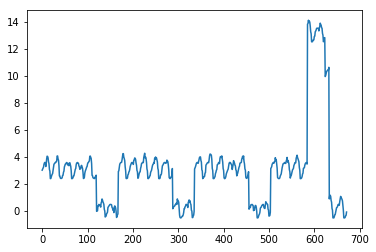

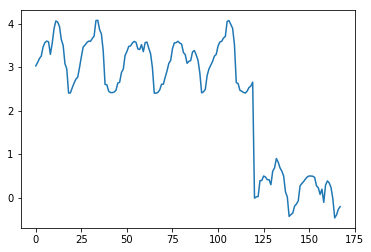

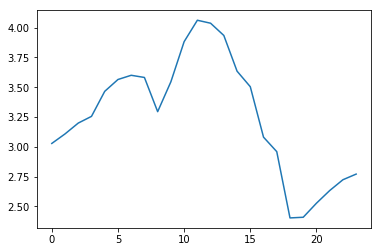

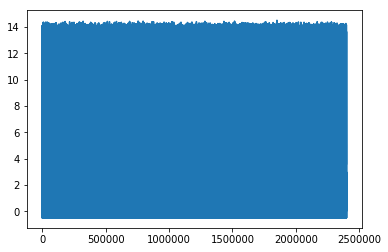

In [7]:
BASE_PATTERN.plot(plot_the_smoother_line = True, plot_till=24*28)
BASE_PATTERN.plot(plot_the_smoother_line = True, plot_till=24*7)
BASE_PATTERN.plot(plot_the_smoother_line = True, plot_till=24)
BASE_PATTERN.plot(plot_the_smoother_line = True)
BASE_PATTERN.move_to_above_zero()
smooth_ys = BASE_PATTERN.get_smooth_values()
print(np.mean(BASE_PATTERN.get_smooth_values()))
print(np.max(BASE_PATTERN.get_smooth_values()))
print(np.min(BASE_PATTERN.get_smooth_values()))
np.save('Dataset_2_normal.npy', smooth_ys)

In [8]:
####  Variation 1: with anomaly ###

# num_days = time_series_length // 24
# num_random_holidays = int(15 / 365 * num_days)
# population = list(range(time_series_length))
# random_holidays = random.sample(population=list(range(num_days)),k = num_random_holidays)
# holidays_peak = random_holidays[0::2]
# holidays_dent = random_holidays[1::2]
# # print(holidays_peak[:100])
# # print(holidays_dent[:100])
# # print(len(holidays_peak) + len(holidays_dent))
# # print(smooth_ys[holidays_peak].shape)
# # print(smooth_ys[holidays_dent].shape)
# BASE_PATTERN.plot(plot_till=24*365)
# BASE_PATTERN.plot()
# holidays_peak_position_list = day_list_2_end_start_tuple_list(holidays_peak, morning_start_at = 0, night_end_at = 25 )
# holidays_peak_magni_list = (np.ones(len(holidays_peak))*4).tolist()
# BASE_PATTERN.move(position_tuple_list=holidays_peak_position_list, magnitude_list=holidays_peak_magni_list, bump_the_smoother_line = True, ramp_it = False)
# BASE_PATTERN.move(position_tuple_list=holidays_peak_position_list, magnitude_list=holidays_peak_magni_list, bump_the_smoother_line = False, ramp_it = False)
# BASE_PATTERN.plot(plot_till=24*365)
# BASE_PATTERN.plot()
# holidays_dent_position_list = day_list_2_end_start_tuple_list(holidays_dent, morning_start_at = 8, night_end_at = 17 )
# holidays_dent_magni_list = (np.random.uniform(low=0.0, high=0.2, size=len(holidays_dent))).tolist()
# BASE_PATTERN.multiply(position_tuple_list=holidays_dent_position_list, magnitude_list=holidays_dent_magni_list, bump_the_smoother_line = True, ramp_it = False)
# BASE_PATTERN.multiply(position_tuple_list=holidays_dent_position_list, magnitude_list=holidays_dent_magni_list, bump_the_smoother_line = False, ramp_it = False)
# BASE_PATTERN.plot(plot_till=24*365)
# BASE_PATTERN.plot()
# smooth_ys = BASE_PATTERN.get_smooth_values()
# np.save('Dataset_2_with_holiday_impact.npy', smooth_ys)

12500

starting_points_list[:10]:
 [238, 716, 1810, 2052, 2292, 2524, 2731, 2911, 3547, 3817]

ending_points_list[:10]:
 [246, 1513, 1898, 2274, 2315, 2681, 2870, 3175, 3620, 3891]

difference_list[:10]:
 [8, 797, 88, 222, 23, 157, 139, 264, 73, 74]

position_short_changes[:20]:
 [(2133, 2229), (3025, 3121), (4244, 4340), (4587, 4683), (4910, 5006), (5626, 5722), (5926, 6022), (10033, 10129), (10213, 10309), (12544, 12640), (13672, 13768), (15278, 15374), (16046, 16142), (19066, 19162), (23585, 23681), (24987, 25083), (26165, 26261), (27936, 28032), (28155, 28251), (28387, 28483)]

position_med_changes[:20]:
 [(11877, 11997), (13185, 13305), (18552, 18672), (21279, 21399), (21623, 21743), (25364, 25484), (26477, 26597), (29688, 29808), (30430, 30550), (31239, 31359), (32896, 33016), (36723, 36843), (43488, 43608), (46068, 46188), (48997, 49117), (51515, 51635), (52908, 53028), (55393, 55513), (55980, 56100), (59868, 59988)]

position_long_changes[:20]:
 [(1086, 1446), (22567, 22927), (

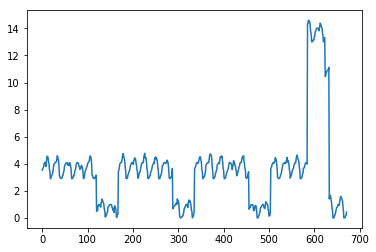

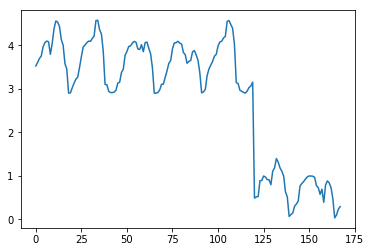

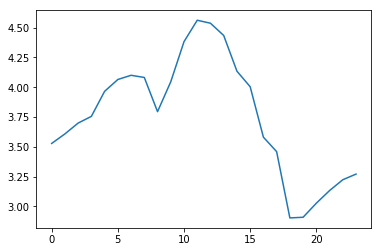

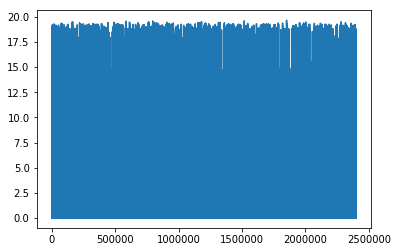

In [9]:
### Variation 2: change point ####

num_changes = int(0.3 / 192 * time_series_length)
average_distance = time_series_length // num_changes # roughly about one change per month

# three types of change:
# a few days
# more than one week
# more than half month


# ===> 选择2%的数据点对应的时间节点 [0,time_series_length]，生成列表，计算各两点之间的差值，放入差值列表
    # random.sample(population, k)
    # Return a k length list of unique elements chosen from the population sequence or set. Used for random sampling without replacement.

population = list(range(time_series_length))
num_changes = int(1 / 192 * time_series_length)
if (num_changes % 2 != 0):
    num_changes += 1
print(num_changes)
list_chosen_x = random.sample(population=population, k = num_changes)
list_chosen_x.sort()
starting_points_list = list_chosen_x[0::2]
ending_points_list = list_chosen_x[1::2]
difference_ndarray = np.array(ending_points_list) - np.array(starting_points_list)
difference_list = difference_ndarray.tolist()

# preview
print("\nstarting_points_list[:10]:\n", starting_points_list[:10])
print("\nending_points_list[:10]:\n", ending_points_list[:10])
print("\ndifference_list[:10]:\n", difference_list[:10])

# print("\nnumber of (start, end) pairs: ", len(difference_list))
# print("average length:", np.mean(difference_ndarray)) # around 20
# print("minimum length:", np.min(difference_ndarray)) # amost always 1
# print("maximum length:", np.max(difference_ndarray)) # usually 120+, rarely over 200
# print("ratio: ", sum(difference_list)/time_series_length) # around 0.5

# starting_points_list = starting_points_list[:10]
# ending_points_list = ending_points_list[:10]
# difference_list = difference_list[:10]

assert(len(starting_points_list) == len(ending_points_list) == len(difference_list))

# three types of change:
# 1. a few days' change in one week (7*24, 14 * 24)
# 2. more than one week's change in a month (14*24, 28*24)
# 3. more than half month's change in more than a month (28*24, )


position_short_changes = []
short_threshold = 7*24
short_change_duration = 4 * 24
position_med_changes = []
med_threshold = 14*24
med_change_duration = 5 * 24
position_long_changes = []
long_threshold = 28*24
long_change_duration = 15 * 24
for i in range(len(difference_list)):
    init_start_pts, init_end_pts = starting_points_list[i], ending_points_list[i]
    init_pos_distance = init_end_pts - init_start_pts
    assert(init_pos_distance == difference_list[i])
    if (difference_list[i] > long_threshold):
        assert(init_pos_distance > short_change_duration)
        real_start_pts = np.random.randint(low = init_start_pts, high = init_start_pts + init_pos_distance - long_change_duration)
        real_end_pts = real_start_pts + long_change_duration
        assert(real_end_pts <= init_end_pts)
        this_pos_tuple = (real_start_pts,real_end_pts)
        position_long_changes.append(this_pos_tuple)
        
    elif (difference_list[i] > med_threshold):
        assert(init_pos_distance > short_change_duration)
        real_start_pts = np.random.randint(low = init_start_pts, high = init_start_pts + init_pos_distance - med_change_duration)
        real_end_pts = real_start_pts + med_change_duration
        assert(real_end_pts <= init_end_pts)
        this_pos_tuple = (real_start_pts,real_end_pts)
        position_med_changes.append(this_pos_tuple)
        
    elif (difference_list[i] > short_threshold):
        assert(init_pos_distance > short_change_duration)
        real_start_pts = np.random.randint(low = init_start_pts, high = init_start_pts + init_pos_distance - short_change_duration)
        real_end_pts = real_start_pts + short_change_duration
        assert(real_end_pts <= init_end_pts)
        this_pos_tuple = (real_start_pts,real_end_pts)
        position_short_changes.append(this_pos_tuple)

print("\nposition_short_changes[:20]:\n", position_short_changes[:20])
print("\nposition_med_changes[:20]:\n", position_med_changes[:20])
print("\nposition_long_changes[:20]:\n", position_long_changes[:20])

print()
print(len(position_short_changes))
print(len(position_med_changes))
print(len(position_long_changes))
print(len(position_short_changes) + len(position_med_changes) + len(position_long_changes))
print()

num_short_changes = len(position_short_changes)
num_med_changes = len(position_med_changes)
num_long_changes = len(position_long_changes)

print(np.mean(BASE_PATTERN.get_smooth_values()))
print(np.median(BASE_PATTERN.get_smooth_values()))
print(np.percentile(BASE_PATTERN.get_smooth_values(), 92.5))
print(np.max(BASE_PATTERN.get_smooth_values()))
print(np.min(BASE_PATTERN.get_smooth_values()))

bump_extent = np.percentile(BASE_PATTERN.get_smooth_values(), 92.5)

BASE_PATTERN.move(position_tuple_list=position_short_changes, magnitude_list=np.ones(num_short_changes)*bump_extent, bump_the_smoother_line = True, ramp_it = False)
BASE_PATTERN.move(position_tuple_list=position_med_changes, magnitude_list=np.ones(num_med_changes)*bump_extent, bump_the_smoother_line = True, ramp_it = False)
BASE_PATTERN.move(position_tuple_list=position_long_changes, magnitude_list=np.ones(num_long_changes)*bump_extent, bump_the_smoother_line = True, ramp_it = False)


4.212779064275607
3.815589067672498
9.087969834094134
19.664874091045956
0.0


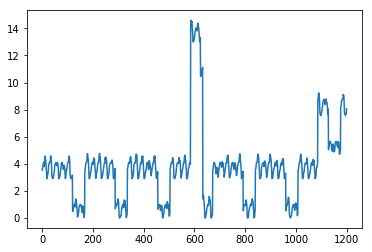

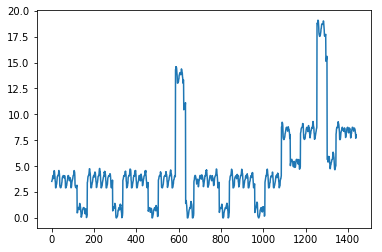

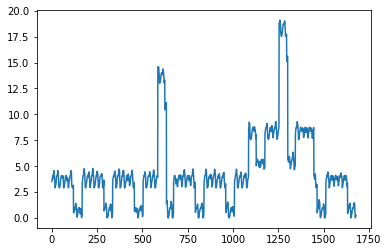

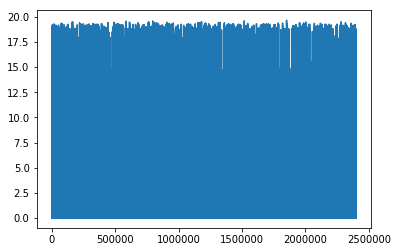

In [14]:

BASE_PATTERN.plot(plot_the_smoother_line = True, plot_till=24*50)
BASE_PATTERN.plot(plot_the_smoother_line = True, plot_till=24*60)
BASE_PATTERN.plot(plot_the_smoother_line = True, plot_till=24*70)
BASE_PATTERN.plot(plot_the_smoother_line = True)

print(np.mean(BASE_PATTERN.get_smooth_values()))
print(np.median(BASE_PATTERN.get_smooth_values()))
print(np.percentile(BASE_PATTERN.get_smooth_values(), 92.5))
print(np.max(BASE_PATTERN.get_smooth_values()))
print(np.min(BASE_PATTERN.get_smooth_values()))
np.save('Dataset_2_normal_with_changes.npy',BASE_PATTERN.get_smooth_values())

In [16]:
position_short_changes = np.array(position_short_changes)
np.save("position_short_changes.npy",position_short_changes)
position_med_changes = np.array(position_med_changes)
np.save("position_med_changes.npy",position_med_changes)
position_long_changes = np.array(position_long_changes)
np.save("position_long_changes.npy",position_long_changes)